<a href="https://colab.research.google.com/github/SridharaniKatipally/PRODIGY_DS_04/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Training Data Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Validation Data Columns: Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')
Training Data Shape: (74681, 4)
Validation Data Shape: (999, 4)


<ipython-input-4-2e25df18825f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette=['red', 'blue', 'green'])


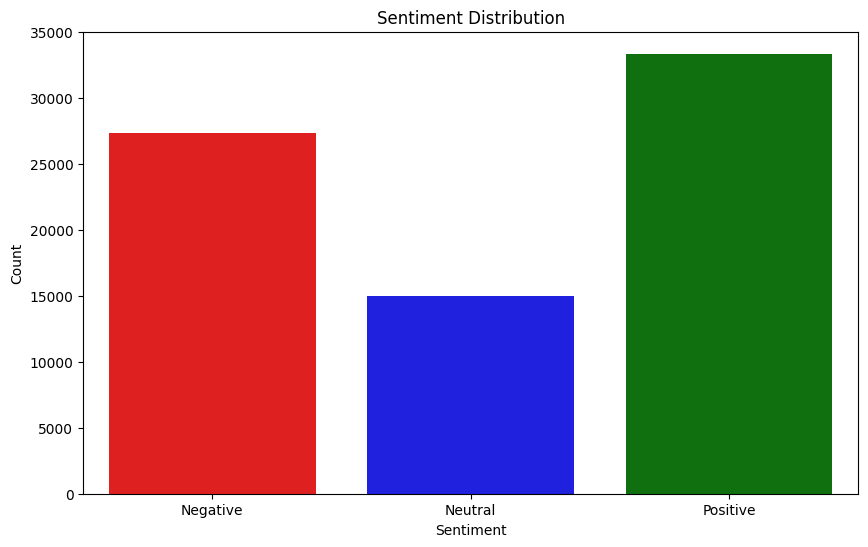

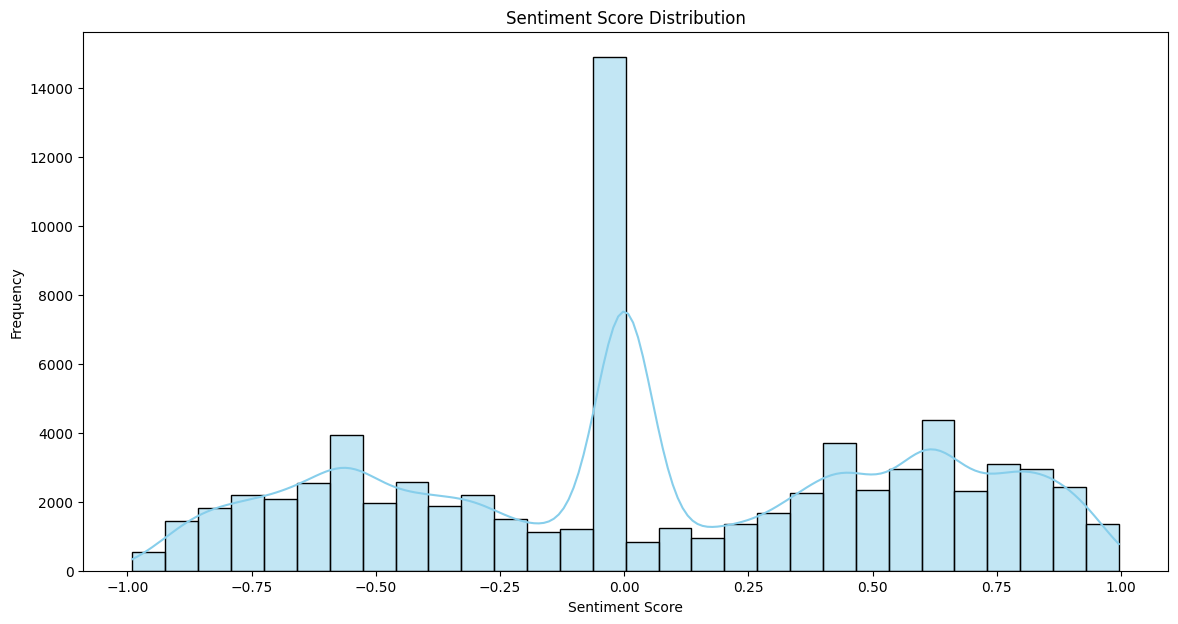

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load the CSV files with error handling
training_data = pd.read_csv('/content/sample_data/twitter_training.csv', on_bad_lines='skip')
validation_data = pd.read_csv('/content/sample_data/twitter_validation.csv', on_bad_lines='skip')

# Inspect the columns of the datasets
print("Training Data Columns:", training_data.columns)
print("Validation Data Columns:", validation_data.columns)

# Check the shape of the datasets
print("Training Data Shape:", training_data.shape)
print("Validation Data Shape:", validation_data.shape)

# Combine the datasets
data = pd.concat([training_data, validation_data])

# Assuming the datasets have columns: ['id', 'brand', 'sentiment', 'text'] or similar.
# Adjust the column names based on the actual columns in your datasets
if len(data.columns) == 8:
    data.columns = ['id', 'brand', 'sentiment', 'text', 'col5', 'col6', 'col7', 'col8']
elif len(data.columns) == 4:
    data.columns = ['id', 'brand', 'sentiment', 'text']
else:
    # If the number of columns is different, print the columns to inspect
    print("Data Columns:", data.columns)

# Preprocess the text data
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in ('!', '.', ':', '?')])  # Remove punctuation
    return text

data['text'] = data['text'].apply(preprocess_text)

# Perform sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
data['vader_sentiment'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiments
data['sentiment_category'] = pd.cut(data['vader_sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Visualize the sentiment patterns
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=data, palette=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Visualize sentiment scores
plt.figure(figsize=(14, 7))
sns.histplot(data['vader_sentiment'], kde=True, bins=30, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()
